# School of Computing and Information Systems
## The University of Melbourne
### COMP30027 MACHINE LEARNING (Semester 1, 2019)
### Practical exercises: Week 5

Today, we will expect you to be referring to the API 1 for scikit-learn (http://scikit-learn.
org/stable/modules/classes.html) — you should also refer to previous weeks’ exercises where
necessary. In particular, we will be examining the behaviour of some Support Vector Machine classifiers.

## 1
The scikit-learn documentation isn’t just an API; there are many useful examples in the “User
Guide” — navigate to “Plot different classifiers in the iris dataset” in Section 1.4.1.
https://scikit-learn.org/stable/auto_examples/svm/plot_iris.html.

### (a) 
Examine the visualisations of the four different SVMs, paying close attention to the decision
boundaries. Which do you think has the best expressitivity, based on the two–dimensional
slice shown?

*Well, this is largely a matter of perspective. However, based solely on the information given, the straight-line boundaries of the linear-kernel SVMs appear to be slightly too simple for this dataset.*

### (b) 
Examine the visualisation of the four models on
some other pairs of attributes from the Iris dataset, e.g. petal length vs. petal width.

['DESCR', 'data', 'feature_names', 'target', 'target_names']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


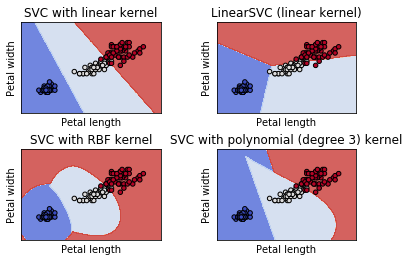

In [2]:
# Derived from the scikit-learn documentation example from:
# https://scikit-learn.org/stable/auto_examples/svm/plot_iris.html
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
print(dir(iris))
print(iris.feature_names)

# petal length and petal width are the final two attributes.
X = iris.data[:, 2:]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = [clf.fit(X, y) for clf in models]

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Petal length')
    ax.set_ylabel('Petal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show();

### (c) 
The default value of the C parameter (the “penalty” for mis-classified examples) is 1. Increase
(or decrease) this value and observe how the decision boundaries change.

*Higher C means a higher penalty for misclassification (harder margins), so we'll have more complex/expressive/high-variance decision boundaries that might work very well for the training data, but might not work well (generalise) for the test data. Later, we can observe this by calculating accuracy on using holdout or cross-validation.*

### (d) 
Calculate the training accuracy of the various SVM classifiers that you graphed above. Do
you see any evidence that any of these classifiers might be overfitting this data?

In [3]:
#these models are already fitted to the whole iris dataset
#Note that they are trained only on 2 out of four features.
print("X shape: {}".format(X.shape))
for title, model in zip(titles, models):
    acc = model.score(X, y)
    print(title, acc)

X shape: (150, 2)
SVC with linear kernel 0.9666666666666667
LinearSVC (linear kernel) 0.94
SVC with RBF kernel 0.9666666666666667
SVC with polynomial (degree 3) kernel 0.96


*The accuracy on the training data does look suspiciously high - especially in light of the different decision boundaries - but we need more information to be sure.*

# 2.
Let’s summarise some earlier work. Use all four attributes from the Iris data, and compare the
training accuracy with the accuracy estimated by 10–fold (stratified) cross–validation, for the
following models:

(a) One-R

(b) 1-Nearest Neighbour ( neighbors.KNeighborsClassifier )

(c) 5-Nearest Neighbour

(d) Decision Trees

(e) LinearSVC()

(f) SVMs with a cubic kernel

(g) SVMs with an RBF kernel

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
#print(cross_val_score(zero_r, X, y, cv=10))
X = iris.data
y = iris.target

#try to change C to 1000 or 0.001
C = 1.0  # SVM regularization parameter
models = [DecisionTreeClassifier(max_depth=1),
          KNeighborsClassifier(n_neighbors=1),
          KNeighborsClassifier(n_neighbors=5),
          DecisionTreeClassifier(max_depth=None),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C)]
titles = ['1-R',
          '1-Nearest Neighbour',
          '5-Nearest Neighbour',
          'Decision Tree',
          'LinearSVC',
          'SVM with a cubic kernel',
          'SVM with an RBF kernel']

title_training_acc = {}
for title, model in zip(titles, models):
    model.fit(X, y)
    title_training_acc[title] = model.score(X, y)

title_crossvalidation_acc = {}
for title, model in zip(titles, models):
    title_crossvalidation_acc[title] = np.mean(cross_val_score(model, X, y, cv=10))

for title in titles:
    print(title, ': Training Acc', title_training_acc[title], '; X-Val Acc', title_crossvalidation_acc[title])
    

1-R : Training Acc 0.6666666666666666 ; X-Val Acc 0.6666666666666667
1-Nearest Neighbour : Training Acc 1.0 ; X-Val Acc 0.96
5-Nearest Neighbour : Training Acc 0.9666666666666667 ; X-Val Acc 0.9666666666666668
Decision Tree : Training Acc 1.0 ; X-Val Acc 0.9533333333333334
LinearSVC : Training Acc 0.9666666666666667 ; X-Val Acc 0.9666666666666668
SVM with a cubic kernel : Training Acc 0.98 ; X-Val Acc 0.9733333333333334
SVM with an RBF kernel : Training Acc 0.98 ; X-Val Acc 0.9733333333333334


*Aside from 1-R (our baseline), all of these learners can build a model that predicts the data fairly well, even when it is unseen (in cross-validation). The only learners that are probably overfitting are 1-NN and the Decision Tree; this is a fairly common phenomenon, as they agressively attempt to reproduce the training data exactly. Generally though, Iris is a fairly easy problem for most of the ML models; probably because the attribute (especially related to the petals) suggest the class very strongly. As the semester continues, we'll examine some more non-trivial problems.*